In [15]:
import numpy as np
import pandas as pd

In [16]:
def load_data(filename):
    path = f"..\Data-Science\data"
    df = pd.read_csv(path)
    return df


In [18]:
data = pd.read_csv("data.csv")

In [19]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


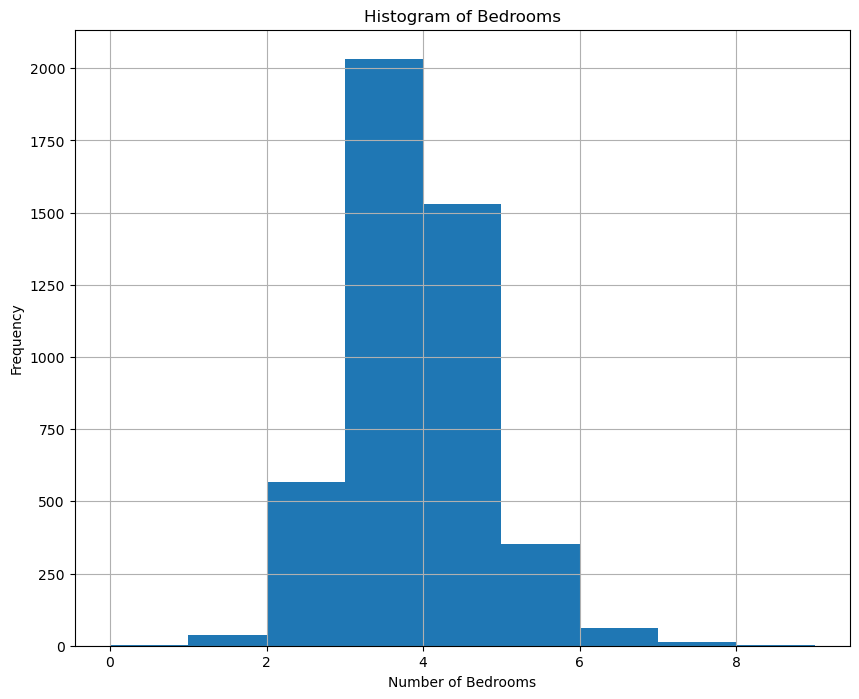

In [36]:
import matplotlib.pyplot as plt

# Plot 1: Histogram of bedrooms
# Converting 'bedrooms' to integer to fix the histogram binning issue
data['bedrooms'] = data['bedrooms'].astype(int)

# plotting the Histogram of bedrooms
plt.figure(figsize=(10, 8))
plt.hist(data['bedrooms'], bins=range(0, data['bedrooms'].max() + 1))
plt.title('Histogram of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


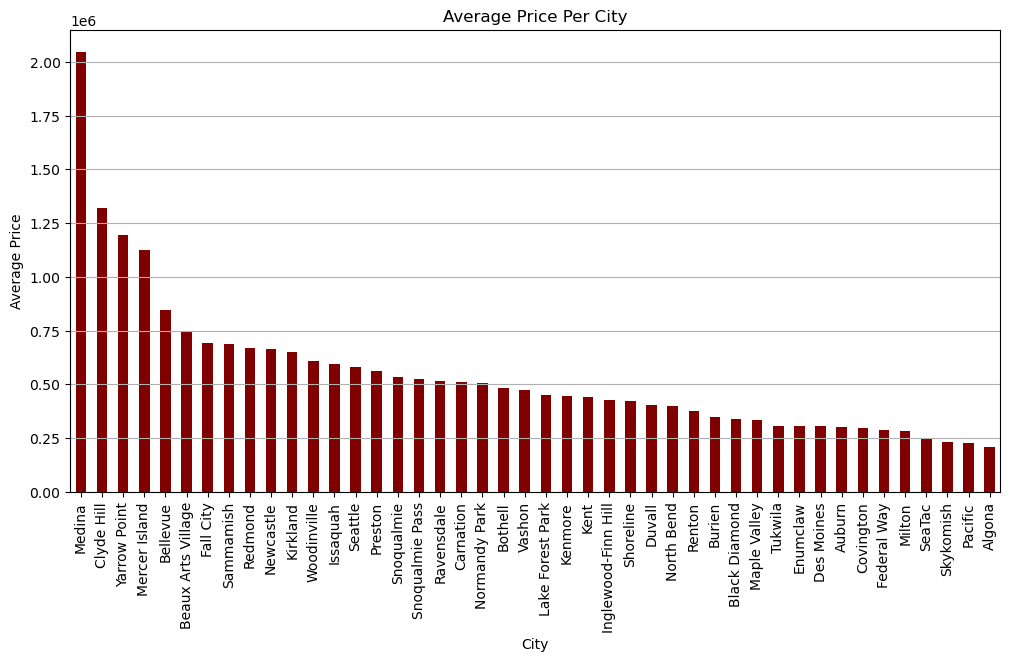

In [47]:
# Calculate average price per city
average_price_per_city = data.groupby('city')['price'].mean().sort_values(ascending=False)

# Plotting average price per city
plt.figure(figsize=(12, 6))
average_price_per_city.plot(kind='bar', color='maroon')
plt.title('Average Price Per City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Calculate price distribution statistics by city
price_distribution_by_city = data.groupby('city')['price'].describe().sort_values(by='mean', ascending=False)



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


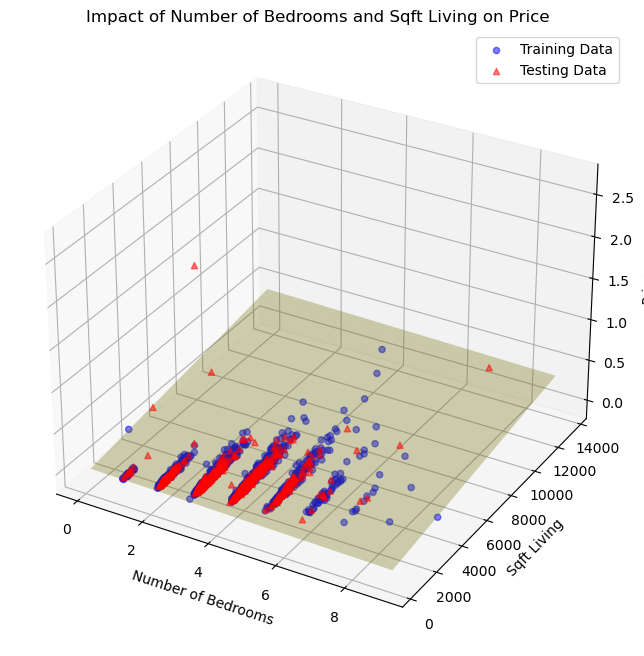

(0.028215822976075056, 995525.2564813527)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = data[['bedrooms', 'sqft_living']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plotting the data and the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['bedrooms'], X_train['sqft_living'], y_train, c='b', marker='o', alpha=0.5, label='Training Data')
ax.scatter(X_test['bedrooms'], X_test['sqft_living'], y_test, c='r', marker='^', alpha=0.5, label='Testing Data')

# Creating a mesh grid for the plane
bedrooms_range = np.linspace(X['bedrooms'].min(), X['bedrooms'].max(), 10)
sqft_living_range = np.linspace(X['sqft_living'].min(), X['sqft_living'].max(), 10)
bedrooms_grid, sqft_living_grid = np.meshgrid(bedrooms_range, sqft_living_range)
price_grid = model.predict(np.c_[bedrooms_grid.ravel(), sqft_living_grid.ravel()]).reshape(bedrooms_grid.shape)

# Plotting the regression plane
ax.plot_surface(bedrooms_grid, sqft_living_grid, price_grid, color='yellow', alpha=0.3)

ax.set_title('Impact of Number of Bedrooms and Sqft Living on Price')
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Sqft Living')
ax.set_zlabel('Price')
ax.legend()
plt.show()

# Calculate and display the model's R-squared value and RMSE
r_squared = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

r_squared, rmse


The analysis of the impact of the number of bedrooms and square footage (sqft_living) on property prices using multiple linear regression has been successfully executed. Here are the results:

3D Scatter Plot with Regression Plane: The plot shows the relationship between the number of bedrooms, square footage, and property prices. Blue dots represent the training data, red triangles represent the testing data, and the yellow plane represents the regression model's predictions.

Model Performance:

R-squared value: 0.0282, indicating that only about 2.82% of the variance in property prices can be explained by the number of bedrooms and square footage. This suggests a weak explanatory power of the model for these features alone.
Root Mean Squared Error (RMSE): Approximately 995,525, which measures the average error of the model's predictions in terms of property prices.
These results indicate that while the number of bedrooms and square footage do impact property prices, other factors are likely more significant in determining prices.